In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv(r"D:\Project (New)\New folder\Daily-News-for-Stock-Market-Prediction\Combined_News_DJIA.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

This label columns is about Dow Jones Industrial Average (DJIA) close value. <br>--> 1 means that Close value stayed the same. <br>--> 0 means close value changed.

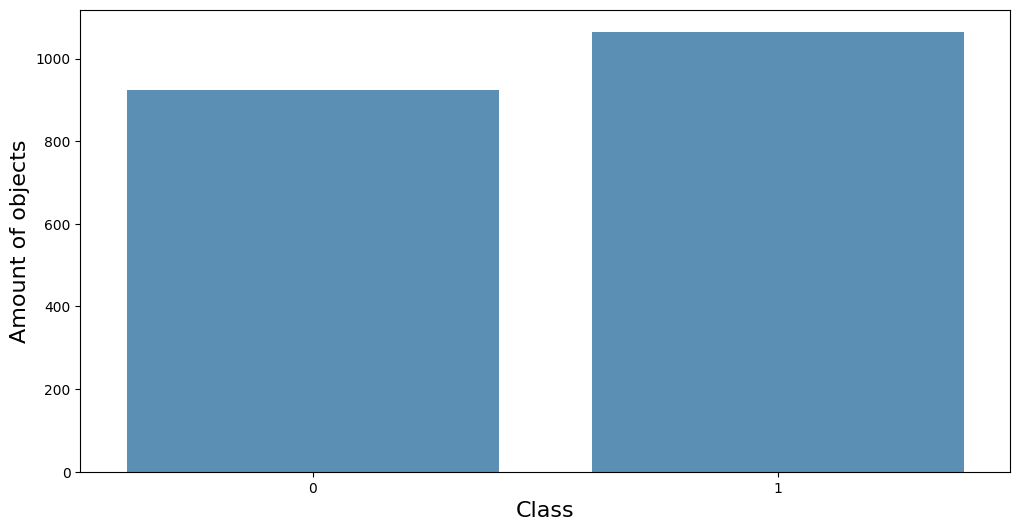

In [3]:
# Plot the Labels distribution
plt.figure(figsize=(12,6))
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
sns.barplot(data=label_counts, x='Label', y='Count', alpha=0.8)
plt.ylabel('Amount of objects', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.show();

In [4]:
df['Label'].value_counts()

Label
1    1065
0     924
Name: count, dtype: int64

We have an almost equal class balance in the whole dataset.

In [5]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

The null values are few so we will just drop them.

In [6]:
df.dropna(subset=['Top23','Top24','Top25'], inplace=True)

In [7]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [8]:
df.shape

(1986, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1986 non-null   object
 1   Label   1986 non-null   int64 
 2   Top1    1986 non-null   object
 3   Top2    1986 non-null   object
 4   Top3    1986 non-null   object
 5   Top4    1986 non-null   object
 6   Top5    1986 non-null   object
 7   Top6    1986 non-null   object
 8   Top7    1986 non-null   object
 9   Top8    1986 non-null   object
 10  Top9    1986 non-null   object
 11  Top10   1986 non-null   object
 12  Top11   1986 non-null   object
 13  Top12   1986 non-null   object
 14  Top13   1986 non-null   object
 15  Top14   1986 non-null   object
 16  Top15   1986 non-null   object
 17  Top16   1986 non-null   object
 18  Top17   1986 non-null   object
 19  Top18   1986 non-null   object
 20  Top19   1986 non-null   object
 21  Top20   1986 non-null   object
 22  Top21   1986 non-null   objec

In [11]:
df.duplicated().sum()

np.int64(0)

According to the Dataset publisher on Kaggle older data is better to used as training set (2008-08-08 to 2014-12-31) and newer data for test set (from 2015-01-02 to 2016-07-01).<br> This recommendation roughly 80%/20% split.

In [12]:
# Define the test and training data
df_train = df[df['Date'] < '2015-01-01']
df_test = df[df['Date'] > '2014-12-31']
print(f"Training length is: {len(df_train)} \nTesting length is: {len(df_test)}")

Training length is: 1608 
Testing length is: 378


In [13]:
# We need to see the whole text on the dataframe that 's why we need to display.max_colwidth
pd.set_option('display.max_colwidth', None)

# Let 's just visualize a sample of what 's going on with these headers
display(df_train.head(4).iloc[:, 2:4])

,Top1,Top2
0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.'
1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict'
2,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'"""
3,b' U.S. refuses Israel weapons to attack Iran: report',"b""When the president ordered to attack Tskhinvali [the capital of South Ossetia], we knew then we were doomed. How come he didn't realize that?"""


## Preprocessing

Steps that we need to follow:<br>

a) Lowercasing the data.<br>

b) Remove Puntuations.<br>

c) Remove stopwords. Why we need to remove the stopwords?<br>
 _Stop words are only for sentence formation but in the meaning of the sentence, stop words are not important. Examples of stopwords are 'the', 'is', 'and' etc._

d) Remove emojis, HTML Tags , ChatWords. It is really unexpected to get emojis and ChatWords on reddit headings but we should implement a function to be ensure accurate analysis and text understanding.

e) _Tokenization is a crucial step in NLP text preprocessing where text is segmented into smaller units, typically words or subwords, known as tokens. This process is essential for several reasons. Firstly, it breaks down the text into manageable units for analysis and processing. Secondly, it standardizes the representation of words, enabling consistency in language modeling tasks. Additionally, tokenization forms the basis for feature extraction and modeling in NLP, facilitating tasks such as sentiment analysis, named entity recognition, and machine translation._

d) Apply Lemmatization instead of Stemming as in that way we can use deep learning / embeddings (Word2Vec, BERT)._Lemmatization reduce words to their base or dictionary form (lemma), enhancing consistency and simplifying analysis._

In [14]:
# Tokenize the Headlines into sentences
import re
import string
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import spacy
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
stemmer = PorterStemmer()
stopword = stopwords.words('english') # Define all stopwords in English

translator = str.maketrans('', '', string.punctuation) # creates a mapping to remove all punctuation.

# Regular Expressions to Remove the Emojies from Text or Whole Corpus.
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
# From String we Import Punctuation.
string.punctuation
punc = string.punctuation # Storing punctuation as a variable


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def clean_data(dataset):
    data = dataset.iloc[:,2:27].copy()
    
    for col in data.columns:
        try:            
            data[col] = data[col].str[1:] # Remove the first letter 'b' from each headline in dataset
            
            data[col] = data[col].str.lower() # Lowercasing the headlines
            
            
            data[col] = data[col].str.translate(translator) # Remove all punctuations
            
            # REmove emojis
            data[col] = data[col].apply(lambda x:emoji_pattern.sub('', x))

            # Remove HTML Tags
            pattern = re.compile('<.*?>')
            data[col] = data[col].apply(lambda x:pattern.sub(r'', x))
                      
            # Tokenize sentences and remove stopwords
            data[col] = data[col].apply(word_tokenize)
            data[col] = data[col].apply(lambda tokens: 
                                    [word for word in tokens if word not in stopword])  ### Up here is correct

            lemmatizer = WordNetLemmatizer()
            wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
        
            def stem_words(text):
                return " ".join([stemmer.stem(word) for word in text.split()])

            data[col] = data[col].apply(lambda text: stem_words(text))
            
            def lemmatize_words(text):
                pos_tagged_text = nltk.pos_tag(text.split())
                return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

            data[col] = data[col].apply(lambda text: lemmatize_words(text))
            
        except AttributeError:
            pass
    return data
    
clean_data(df.head(2))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"[georgia, downs, two, russian, warplanes, countries, move, brink, war]","[breaking, musharraf, impeached]","[russia, today, columns, troops, roll, south, ossetia, footage, fighting, youtube]","[russian, tanks, moving, towards, capital, south, ossetia, reportedly, completely, destroyed, georgian, artillery, fire]","[afghan, children, raped, impunity, un, official, says, sick, three, year, old, raped, nothing]","[150, russian, tanks, entered, south, ossetia, whilst, georgia, shoots, two, russian, jets]","[breaking, georgia, invades, south, ossetia, russia, warned, would, intervene, sos, side]","[enemy, combatent, trials, nothing, sham, salim, haman, sentenced, 5, 12, years, kept, longer, anyway, feel, like]","[georgian, troops, retreat, osettain, capital, presumably, leaving, several, hundred, people, killed, video]","[us, prep, georgia, war, russia]",...,"[georgia, invades, south, ossetia, russia, gets, involved, nato, absorb, georgia, unleash, full, scale, war]","[alqaeda, faces, islamist, backlash]","[condoleezza, rice, us, would, act, prevent, israeli, strike, iran, israeli, defense, minister, ehud, barak, israel, prepared, uncompromising, victory, case, military, hostilities]","[busy, day, european, union, approved, new, sanctions, iran, protest, nuclear, programme]","[georgia, withdraw, 1000, soldiers, iraq, help, fight, russian, forces, georgias, breakaway, region, south, ossetia]","[pentagon, thinks, attacking, iran, bad, idea, us, news, amp, world, report]","[caucasus, crisis, georgia, invades, south, ossetia]","[indian, shoe, manufactory, series, like, work]","[visitors, suffering, mental, illnesses, banned, olympics]","[help, mexicos, kidnapping, surge]"
1,"[wont, america, nato, help, us, wont, help, us, help, iraq]","[bush, puts, foot, georgian, conflict]","[jewish, georgian, minister, thanks, israeli, training, fending, russia]","[georgian, army, flees, disarray, russians, advance, gori, abandoned, russia, without, shot, fired]","[olympic, opening, ceremony, fireworks, faked]","[mossad, fraudulent, new, zealand, passports, iraq]","[russia, angered, israeli, military, sale, georgia]","[american, citizen, living, sossetia, blames, us, georgian, leaders, genocide, innocent, people]","[welcome, world, war, iv, high, definition]","[georgias, move, mistake, monumental, proportions]",...,"[israel, us, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much, victims]","[riots, still, going, montreal, canada, police, murdered, boy, saturday]","[china, overtake, us, largest, manufacturer]","[war, south, ossetia, pics]","[israeli, physicians, group, condemns, state, torture]","[russia, beaten, united, states, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, better, war]","[come, trading, sex, food]"


-------------------------- ΤΟ παρακατω το εφτιαξε το chat και νομιζω οτι η συμπεριφορα του ειναι καλύερη και το lemmatize ειναι πιο σωστο.--------------------------------

In [23]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
import re, string

stopwords_list = stopwords.words('english')
translator = str.maketrans('', '', string.punctuation)
emoji_pattern = re.compile("[" 
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_data(dataset):
    data = dataset.copy()
    
    for col in data.columns[2:27]:
        def process_text(text):
            if not isinstance(text, str):
                return []
            text = text[1:] if text.startswith("b'") else text
            text = text.lower()
            text = text.translate(translator)
            text = emoji_pattern.sub('', text)
            text = re.sub('<.*?>', '', text)
            tokens = word_tokenize(text)
            tokens = [t for t in tokens if t not in stopwords_list]
            # Lemmatize
            pos_tags = pos_tag(tokens)
            tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

            return tokens

        data[col] = data[col].apply(process_text)
    
    return data
clean_data(df)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"[bgeorgia, down, two, russian, warplane, country, move, brink, war]","[break, musharraf, impeach]","[russia, today, columns, troop, roll, south, ossetia, footage, fight, youtube]","[russian, tank, move, towards, capital, south, ossetia, reportedly, completely, destroyed, georgian, artillery, fire]","[bafghan, child, rap, impunity, un, official, say, sick, three, year, old, rap, nothing]","[150, russian, tank, enter, south, ossetia, whilst, georgia, shoot, two, russian, jet]","[bbreaking, georgia, invades, south, ossetia, russia, warn, would, intervene, sos, side]","[bthe, enemy, combatent, trial, nothing, sham, salim, haman, sentence, 5, 12, year, keep, long, anyway, feel, like]",...,"[georgia, invades, south, ossetia, russia, get, involve, nato, absorb, georgia, unleash, full, scale, war]","[alqaeda, face, islamist, backlash]","[condoleezza, rice, u, would, act, prevent, israeli, strike, iran, israeli, defense, minister, ehud, barak, israel, prepare, uncompromising, victory, case, military, hostility]","[busy, day, european, union, approve, new, sanction, iran, protest, nuclear, programme]","[bgeorgia, withdraw, 1000, soldier, iraq, help, fight, russian, force, georgias, breakaway, region, south, ossetia]","[pentagon, think, attack, iran, bad, idea, u, news, amp, world, report]","[caucasus, crisis, georgia, invades, south, ossetia]","[indian, shoe, manufactory, series, like, work]","[visitor, suffer, mental, illness, ban, olympics]","[bno, help, mexicos, kidnapping, surge]"
1,2008-08-11,1,"[wont, america, nato, help, u, wont, help, u, help, iraq]","[bush, put, foot, georgian, conflict]","[bjewish, georgian, minister, thanks, israeli, train, fending, russia]","[georgian, army, flees, disarray, russian, advance, gori, abandon, russia, without, shot, fire]","[bolympic, open, ceremony, firework, fake]","[mossad, fraudulent, new, zealand, passport, iraq]","[russia, anger, israeli, military, sale, georgia]","[american, citizen, live, sossetia, blame, u, georgian, leader, genocide, innocent, people]",...,"[israel, u, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much, victim]","[riot, still, go, montreal, canada, police, murder, boy, saturday]","[china, overtake, u, large, manufacturer]","[war, south, ossetia, pic]","[israeli, physician, group, condemn, state, torture]","[russia, beaten, united, state, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, well, war]","[bso, come, trading, sex, food]"
2,2008-08-12,0,"[remember, adorable, 9yearold, sang, open, ceremony, fake]","[brussia, end, georgia, operation]","[sexual, harassment, would, child]","[balqaeda, lose, support, iraq, brutal, crackdown, activity, regard, unislamic, include, woman, buy, cucumber]","[ceasefire, georgia, putin, outmaneuvers, west]","[microsoft, intel, try, kill, xo, 100, laptop]","[stratfor, russogeorgian, war, balance, power]","[bim, try, get, sense, whole, georgiarussia, war, vote, think, georgia, start, think, russia]",...,"[u, troop, still, georgia, know, georgia, first, place]","[russias, response, georgia, right]","[gorbachev, accuse, u, make, serious, blunder, pursue, interest, caucasus, region]","[russia, georgia, nato, cold, war, two]","[remember, adorable, 62yearold, led, country, war, base, evidence, fake]","[war, georgia, israeli, connection]","[sign, point, u, encouraging, georgia, invade, south, ossetia, goddamnit, bush]","[christopher, king, argues, u, nato, behind, georgian, invasion, south, ossetia, misjudge, russian, resolve]","[america, new, mexico]","[bbbc, news, asiapacific, extinction, man, climate]"
3,2008-08-13,0,"[u, refuse, israel, weapon, attack, iran, report]","[bwhen, president, order, attack, tskhinvali, capital, south, ossetia, knew, doom, come, didnt, realize]","[israel, clear, troop, kill, reuters, cameraman]","[britain, policy, tough, dru

# Words Embedding Techniques
Word embedding techniques provide a way to represent words as vectors in a continuous vector space. Word embeddings are numerical representations of words<br> that show semantic similarities and correlations depending on how frequently they appear in a given dataset. Through the conversion of words into continuous vector spaces, these representations enable machines to <br> interpret and analyze human language with greater efficiency.

There are two major types of word Embeddings:

- The Frequency Bsed Embeddings (Bag Of Words, TF-IDF)
    - Bag-of-Words (BoW) is a text representation technique that represents a document as an unordered set of words and their respective frequencies.<br> It discards the word order and captures the frequency of each word in the document, creating a vector representation. 

    - Term Frequency-Inverse Document Frequency, commonly known as TF-IDF, is a numerical statistic that reflects the importance of a word in a document<br> relative to a collection of documents (corpus).

- Prediction Based Embeddings (Word2Vec)

    - Word2Vec  is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under <br> the category of distributed representation models. There are two neural embedding methods for Word2Vec: Continuous Bag of Words (CBOW) and Skip-gram.
    
        - Continuous Bag of Words (CBOW) is a type of neural network architecture used in the Word2Vec model. The primary objective of CBOW is to predict a target <br> word based on its context, which consists of the surrounding words in a given window.

        - The Skip-Gram model learns distributed representations of words in a continuous vector space. The main objective of Skip-Gram is to predict context words <br> (words surrounding a target word) given a target word. This is the opposite of the Continuous Bag of Words (CBOW) model, where the objective is to predict the target word based on its context

# Bow (Bag Of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
df_train
# Apply the preprocessing stage on training data
df_train = clean_data(df_train)

trainheadlines = []
for row in range(0,len(df_train.index)):
    trainheadlines.append(' '.join(str(x) for x in df_train))

basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)
print(f'The unique words in training data are {basictrain.shape[1]}')

ValueError: empty vocabulary; perhaps the documents only contain stop words